In [1]:
!pip install yfinance pandas beautifulsoup4 requests matplotlib



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt


In [3]:
# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset index and display first five rows
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [9]:
import requests
from bs4 import BeautifulSoup

# URL for Tesla's financials on Yahoo Finance
url = 'https://finance.yahoo.com/quote/TSLA/financials?p=TSLA'

# Send a request to the URL
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Find all the rows containing financial data (like revenue)
# Inspect the page structure to make sure this matches what you need
revenue_data = soup.find_all('td', {'data-test': 'FINANCIALS_REVENUE-value'})

# Extract the revenue values and store them in a list
revenues = [item.get_text() for item in revenue_data]

# Print the revenue data
print(revenues)


[]


In [5]:
# Define the ticker symbol for GameStop
gamestop = yf.Ticker('GME')

# Extract historical stock data (let's use the past 1 year)
gamestop_data = gamestop.history(period="1y")

# Display the first few rows of the data
gamestop_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-02-08 00:00:00-05:00,14.01,14.44,13.89,14.35,1838300,0.0,0.0
2024-02-09 00:00:00-05:00,14.37,15.23,14.30,14.66,3575300,0.0,0.0
2024-02-12 00:00:00-05:00,14.58,15.22,14.53,14.73,2750100,0.0,0.0
2024-02-13 00:00:00-05:00,14.20,14.40,13.77,14.17,3788700,0.0,0.0
2024-02-14 00:00:00-05:00,14.33,14.43,14.05,14.41,2504400,0.0,0.0


In [6]:
# URL for GameStop's financials on Yahoo Finance
url = 'https://finance.yahoo.com/quote/GME/financials'

# Send a request to the URL
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Find the relevant table or data on the page
revenue_table = soup.find_all('td', {'data-test': 'FINANCIALS_REVENUE-value'})

# Extract the revenue
revenues_gme = [revenue.get_text() for revenue in revenue_table]
revenues_gme


[]

In [10]:
!pip install selenium


   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   --------- ------------------------------ 2.4/9.5 MB 14.9 MB/s eta 0:00:01
   -------------------------- ------------- 6.3/9.5 MB 16.1 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.5 MB 16.1 MB/s eta 0:00:01
   ---------------------------------------- 9.5/9.5 MB 14.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ValueError: x and y must have same first dimension, but have shapes (3677,) and (0,)

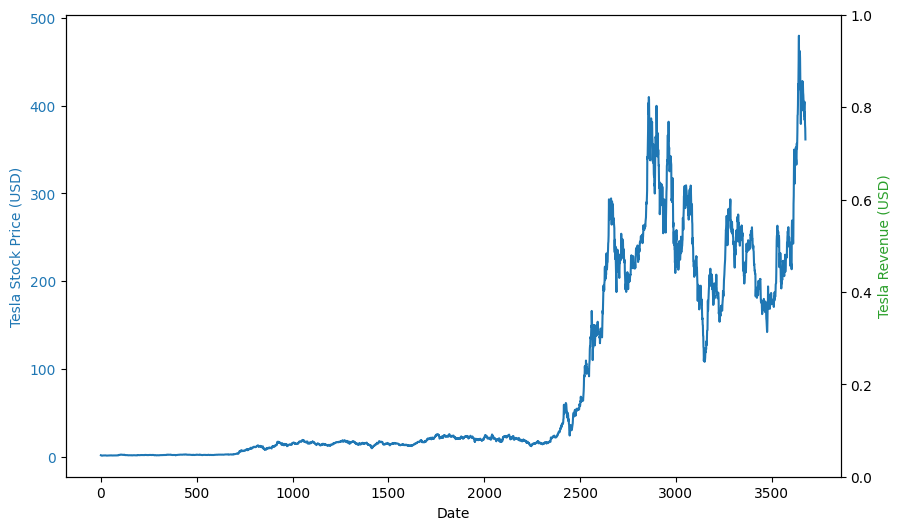

In [7]:
import matplotlib.pyplot as plt

# Combine stock data and revenue data (make sure they're aligned by date)
# For simplicity, assume we have the revenue data in a list (revenue_list)
# Make sure you format the revenue data as numbers (e.g., float)

# Plot Tesla Stock vs Revenue
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Tesla Stock
ax1.set_xlabel('Date')
ax1.set_ylabel('Tesla Stock Price (USD)', color='tab:blue')
ax1.plot(tesla_data.index, tesla_data['Close'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Add a second y-axis to plot Revenue
ax2 = ax1.twinx()
ax2.set_ylabel('Tesla Revenue (USD)', color='tab:green')
ax2.plot(tesla_data.index, revenues, color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.title('Tesla Stock Price vs Revenue')
plt.show()


ValueError: x and y must have same first dimension, but have shapes (251,) and (0,)

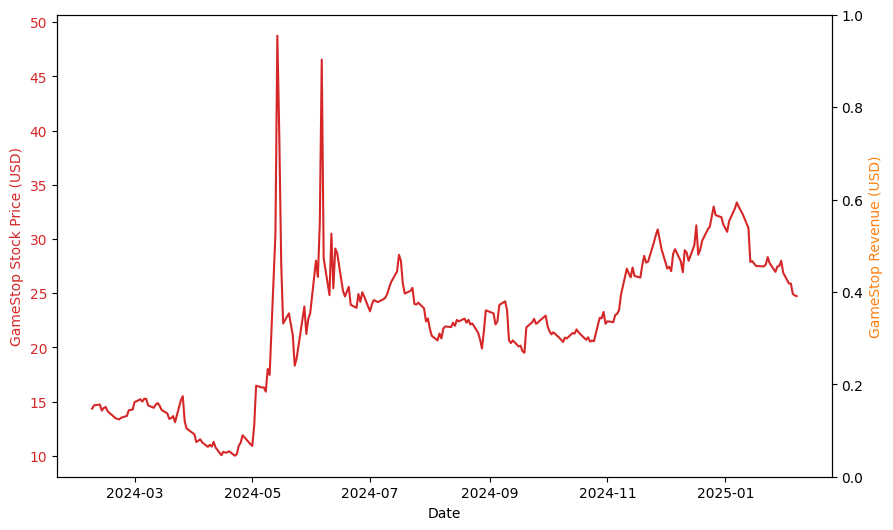

In [8]:
# Combine stock data and revenue data (ensure they're aligned)
# Plot GameStop Stock vs Revenue

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot GameStop Stock
ax1.set_xlabel('Date')
ax1.set_ylabel('GameStop Stock Price (USD)', color='tab:red')
ax1.plot(gamestop_data.index, gamestop_data['Close'], color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Add a second y-axis to plot Revenue
ax2 = ax1.twinx()
ax2.set_ylabel('GameStop Revenue (USD)', color='tab:orange')
ax2.plot(gamestop_data.index, revenues_gme, color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('GameStop Stock Price vs Revenue')
plt.show()
